# Creación de notebooks personalizados

+ La generación de notebooks se puede realizar de forma **programática**.
+ Existen librerías especializadas en la creación de notebooks, siendo la más conocida **nbformat** en Python.
+ Un conocimiento básico del formato **ipynb** de los notebooks es necesario para implementar de forma más eficaz la generación de notebooks.

## El formato _ipynb_

+ Los notebooks son ficheros con extensión **ipynb**.
+ Formato JSON siguiendo un determinado esquema:
  - https://github.com/jupyter/nbformat/blob/master/nbformat/v4/nbformat.v4.schema.json
+ Este esquema es útil como documentación y como forma de **validar** rápidamente si un notebook es válido.
+ **OJO**: El formato de los notebooks es algo que cambia de forma relativamente frecuente entre versiones.
  - Lo desarrollado aquí podría ser ligeramente distinto de la realidad según la versión.
  - En ocasiones se introducen cambios que no son compatibles con versiones anteriores.

![notebook_schema](img/notebook_schema.png)

## Estructura del notebook

+ Un notebook consiste en un diccionario en JSON con cuatro elementos principales:
  - **"cells"**: Una lista de objetos JSON con información sobre las celdas.
  - **"nbformat"**: Un entero que indica la _major version_ de nbformat usada.
  - **"nbformat_minor"**: Un entero que indica la _minor version_ de nbformat usada.
  - **"metadata"**: Un diccionario con información sobre el formato del fichero, el tipo de kernel asociado y demás.

```json
{
    "cells" : [
          # Lista de celdas...
    ],
    "nbformat": 4,
    "nbformat_minor": 4,
    "metadata" : {
        "kernelspec": {
            "display_name": "Python 3 (ipykernel)",
            "language": "python",
            "name": "python3"
        },
        "language_info": {
            "codemirror_mode": {
                "name": "ipython",
                "version": 3
            },
            "file_extension": ".py",
            "mimetype": "text/x-python",
            "name": "python",
            "nbconvert_exporter": "python",
            "pygments_lexer": "ipython3",
            "version": "3.10.6"
        },
        "toc": {
        ...
        }
    }
}
```

### Campo "cells". Tipos de celdas

+ Aunque las celdas pueden ser de varios tipos (markdown, código), todas siguen una estructura común:

```json
{
    "cell_type" : "<type>",
    "metadata" : {},
    "source" : "<single string or [list, of, strings]>",
}
```

+ Algunos campos, especialmente celdas de código o salida de texto, pueden consistir en varias líneas, y **a veces** se almacenan internamente como listas de cadenas de texto que deben concatenarse al mostrarse el notebook.
+ Las librerías de manipulación de notebooks suelen hacer este proceso **automáticamente**.

#### Celdas en Markdown

+ Estas celdas de texto son de tipo **"markdown"** con la siguiente estructura:

```json
{
    "cell_type" : "markdown",
    "metadata" : {},
    "source" : "[multi-line *markdown*]",
}
```

+ En versiones anteriores existían campos adicionales que se han eliminado recientemente.
+ Ejemplo:

```json
{
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# Manejo básico de hojas Jupyter\n",
    "\n",
    "## Tipos de celdas\n",
    "Una hoja Jupyter contiene una sucesión de celdas. Estas celdas pueden ser, principalmente, de dos tipos:\n",
    "\n",
    "+ Celdas de texto: Contienen texto en formato _Markdown_\n",
    "+ Celdas de código: Contienen código a ser ejecutado por el _kernel_. Cuando el código se ejecuta, el resultado obtenido se muestra a continuación de la celda de código."
   ]
  }
```

##### Contenido adjunto en celdas Markdown

+ Las celdas en markdown permiten adjuntar ficheros, normalmente imágenes, en una celda.
+ Aparece un campo `attachments` dentro del JSON de la celda con una serie de claves que describen el contenido.
+ Si no hay contenido adjunto en una celda, el campo `attachments` puede ser nulo o no existir.

##### Ejemplo de una imagen adjunta:

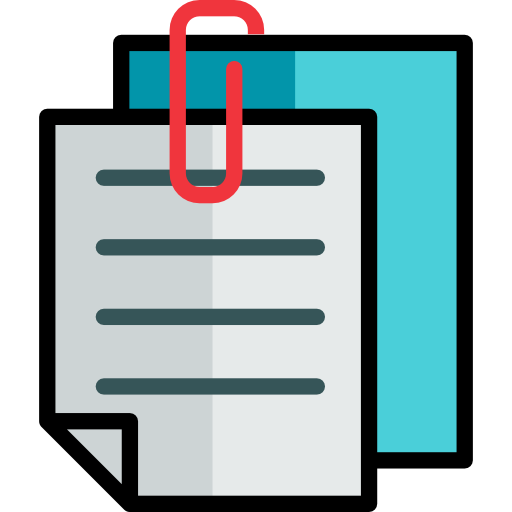

```json
{
    "attachments": {
        "attachment.png": {
         "image/png": "...................................."
        }
    },
    "cell_type": "markdown",
    "metadata": {},
    "source": [
        "##### Ejemplo de una imagen adjunta:\n",
        "\n",
        "![attachment.png](attachment:attachment.png)"
    ]
}
```

#### Celdas de código

+ Las celdas de código contienen, principalmente, los siguientes elementos:
  - El código fuente en el lenguaje del kernel.
  - Una lista de salidas asociadas a la celda.
  - El número de ejecución de la celda.
    * `null` si la celda no se ha ejecutado.
```json
    {
      "cell_type" : "code",
      "execution_count": 1, # integer or null
      "metadata" : {
          "collapsed" : True, # whether the output of the cell is collapsed
          "scrolled": False, # any of true, false or "auto"
          ...
      },
      "source" : "[some multi-line code]",
      "outputs": [{
          # list of output dicts
          "output_type": "stream",
          ...
      }],
    }
```

+ En versiones anteriores existían los campos `input` y `prompt_number`, que han sido renombrados a `source` y `execution_count`.
+ Por ejemplo, una celda de código como la siguiente:

In [ ]:
print("Celda de código en Python")

var1 = "Value 1"
var2 = "Value 2"
var3 = 42

def myDef(arg1, arg2):
    return arg1 + arg2

print(myDef(var1, var2))
print(myDef(var3, var3))

+ ...se representa internamente de la siguiente manera:

```json
{
    "cell_type": "code",
    "execution_count": 9,
    "metadata": {},
    "outputs": [
    {
        "name": "stdout",
        "output_type": "stream",
        "text": [
            "Celda de código en Python\n",
            "Value 1Value 2\n",
            "84\n"
        ]
    }],
   "source": [
       "print(\"Celda de código en Python\")\n",
       "\n",
       "var1 = \"Value 1\"\n",
       "var2 = \"Value 2\"\n",
       "var3 = 42\n",
       "\n",
       "def myDef(arg1, arg2):\n",
       "    return arg1 + arg2\n",
       "\n",
       "print(myDef(var1, var2))\n",
       "print(myDef(var3, var3))"
   ]
}
```

#### Salida de las celdas de código

+ El campo `outputs` de las celdas de código puede ser de tipo _stream_ o de distintos tipos MIME.
+ Todas las salidas tienen un campo `output_type` de cadena de texto indicando esto.

##### Tipo de salida "stream":

+ El tipo de salida más común para celdas de código.
+ `"output_type" : "stream"`
+ Un campo `name` indica si la salida se ha generado por `stdout` o `stderr`

```json
{
    "output_type" : "stream",
    "name" : "stdout", # or stderr
    "text" : "[multiline stream text]",
}
```

##### Tipo de salida "display_data":

+ Cuando la salida es de tipo MIME.
+ `"output_type" : "display_data"`
+ Se utilizan nuevos campos `data` y `metadata` para proporcionar información adicional sobre la salida generada.

```json
{
    "output_type" : "display_data",
    "data" : {
        "text/plain" : "[multiline text data]",
        "image/png": "[base64-encoded-multiline-png-data]",
        "application/json": {
            # JSON data is included as-is
            "key1": "data",
            "key2": ["some", "values"],
            "key3": {"more": "data"}
        },
        "application/vnd.exampleorg.type+json": {
            # JSON data, included as-is, when the mime-type key ends in +json
            "key1": "data",
            "key2": ["some", "values"],
            "key3": {"more": "data"}
        }
    },
    "metadata" : {
        "image/png": {
            "width": 640,
            "height": 480,
        },
    },
}
```

##### Tipo de salida "execute_result":

+ Para registrar resultados de la ejecución de una celda con el `displayhook` de Python.
+ `"output_type" : "execute_result"`
+ Campos similares al tipo de salida `display_data`, pero añadiendo el campo `execution_count` (entero).

```json
{
    "output_type" : "execute_result",
    "execution_count": 42,
    "data" : {
        "text/plain" : "[multiline text data]",
        "image/png": "[base64-encoded-multiline-png-data]",
        "application/json": {
            # JSON data is included as-is
            "json": "data",
        },
    },
    "metadata" : {
        "image/png": {
            "width": 640,
            "height": 480,
        },
    },
}
```

##### Tipo de salida "error":

+ Provocado por una ejecución fallida:
+ `"output_type" : "error"`
+ Proporciona información sobre el error en el campo `"traceback"`

```json
{
    'output_type': 'error',
    'ename' : str,   # Exception name, as a string
    'evalue' : str,  # Exception value, as a string
    # The traceback will contain a list of frames,
    # represented each as a string.
    'traceback' : list,
}
```

### Identificadores de celdas

+ Desde la versión 4.5 del esquema las celdas declaran un campo `id`.
+ Cadena de texto de hasta 64 caracteres alfanuméricos, `-` y `_`.

```json
{
    "cell_type": "markdown",
    "id": "d88999af",
    "metadata": {},
    "source": [
        "![docker-logo](img/docker_logo.png)"
    ]
}
```

### Campo "metadata"

+ El campo "metadata" es el lugar en el que se puede colocar información arbitraria en formato JSON sobre el notebook, las celdas o la salida.

+ Los metadatos se organizan en un espacio de nombres.
  - Si el desarrollador introduce sus propios metadatos, puede hacerlo en un nuevo espacio de nombres.

+ Los notebooks de Jupyter definen algunos campos de metadatos (nombre, tipo, valores) que veremos más adelante, pero ninguno de estos campos es requerido: **Todos** los campos de metadatos son opcionales.

#### Metadatos del notebook

+ A nivel de notebook algunos metadatos interesantes son los siguientes:

|Clave| Valor |Interpretación|
|---|---|---|
|kernelspec | dict |La especificación del kernel|
|kernelspec.display_name | str | El nombre del kernel|
|kernelspec.language | str | El lenguaje de programación|
|authors |list of dicts|La lista de autores del notebook|
|language_info|dict|Detalles sobre el lenguaje del kernel|

```json
nb.metadata.authors = [
    {
        'name': 'Diego Sevilla',
    },
    {
        'name': 'Alberto Hernández',
    },
]
```

#### Metadatos de las celdas

+ Los metadatos introducidos por Jupyter se sitúan en el espacio de nombres `metadata.jupyter`.

|Clave| Valor |Interpretación|
|---|---|---|
|collapsed |bool | Indica si la salida de la celda debería estar colapsada |
|scrolled |bool or 'auto'| Indica si la salida de la celda debe tener barra desplazadora |
|deletable |bool |Si 'False', no permite la eliminación de la celda | 
|editable |bool| Si 'False', no permite la edición de la celda (ni su eliminación) |
|name |str|  El nombre de una celda. Debe ser único en todo el notebook |
|tags |list of str |Una lista de etiquetas para la celda |
|jupyter| dict | El espacio de nombres para campos manejados específicamente por Jupyter |
| jupyter.source_hidden |bool | Indica si se debe mostrar el código fuente de la celda |
|execution |dict | El espacio de nombres para campos referentes a la ejecución de la celda |

+ **OJO**: Dependiendo de la versión de Jupyter quizá algunos metadatos se ignoren.
+ A continuación se muestran algunos metadatos del espacio de nombres `execution`. Son de relativo bajo nivel y normalmente el usuario no deberá editarlos:

|Clave| Valor |Interpretación|
|---|---|---|
|iopub.execute_input |ISO 8601 format |Indica el momento en el que el kernel envía un mensaje `execute_input` |
|iopub.status.busy |ISO 8601 format | Indica el momento en el que el kernel cambia a modo 'busy'. Es decir, cuándo el kernel inició la tarea |
|shell.execute_reply |ISO 8601 format | Indica el momento en el que se crea el mensaje 'execute_reply'. Es decir, cuándo el kernel acabó la tarea |
|iopub.status.idle |ISO 8601 format | Indica el momento en que el estado del kernel pasó a ser 'idle'. Es decir, cuándo el kernel está listo para aceptar otra tarea |

#### Metadatos de salida

+ Metadatos asociados al campo `cell.outputs`:

|Clave| Valor |Interpretación|
|---|---|---|
|isolated |bool | Indica si la salida debería embeberse en un IFrame |


### Compatibilidad entre distintas versiones de notebooks

+ El formato de los notebooks cambia frecuentemente.
+ Los nuevos campos que se van añadiendo no son renderizados por los intérpretes que no reconocen dichos campos.

## Librería Python para trabajar con notebooks

https://nbformat.readthedocs.io/en/latest/api.html

+ Aunque los notebooks se almacenan en formato JSON, se recomienda usar librerías especializadas en lugar de crear objetos JSON a mano.
+ La librería para crear y manejar notebooks en Python es **nbformat**.

### Hello World

In [ ]:
import nbformat as nbf

nb = nbf.v4.new_notebook()

markdownCell = "This is a generated markdown cell"
codeCell = "1 + 2"

nb["cells"] = [nbf.v4.new_markdown_cell(markdownCell), nbf.v4.new_code_cell(codeCell)]

filename = "test.ipynb"

with open(filename, "w") as file:
  nbf.write(nb, file)

+ Para construir notebooks las llamadas más importantes son:

  - `nbformat.v4.new_notebook(**kwargs)`
    * Inicializa un objeto notebook
    * Se puede acceder a los miembros `cells`, `nbformat`, `nbformat_minor` y `metadata` como si fuera un diccionario.
  - `nbformat.v4.new_code_cell(source='', **kwargs)`
  - `nbformat.v4.new_markdown_cell(source='', **kwargs)`
    * Aceptan como parámetro el contenido de la celda.
  - `nbformat.write(nb, fp, version=nbformat.NO_CONVERT, capture_validation_error=None, **kwargs)`
    * Un `write` adaptado a formato notebook. Rellena campos `nbformat` y `nbformat_minor` si no se suministran.

### Lectura y escritura de notebooks

+ Se muestran las funciones más importantes a la hora de interactuar con notebooks.

+ `nbformat.read(fp, as_version, capture_validation_error=None, **kwargs)`
  - Lee un notebook de un fichero y lo convierte a la versión dada por `as_version`.
  - Cualquier error de lectura o conversión se registra en el log.
  - Parámetros más importantes:
    * `fp` (file o str): Un **fichero** con un método `read` o una ruta a dicho fichero como cadena de texto.
    * `as_version` (int): La versión del formato de notebook a devolver. Se convertirá el notebook leído de ser necesario.
  - Devuelve un objeto `NotebookNode`.

+ `nbformat.reads(s, as_version, capture_validation_error=None, **kwargs)`
  - Lee un notebook a partir de un string y retorna un objeto `NotebookNode` con la versión indicada.


+ Ejemplo:

```python
nb = nbformat.read('path/to/notebook.ipynb', as_version=4)`
```


+ `nbformat.write(nb, fp, version=nbformat.NO_CONVERT, capture_validation_error=None, **kwargs)`
  - Escribe un notebook en un fichero en una versión dada.
  - Parámetros más importantes:
    * `nb` (NotebookNode): El notebook a escribir.
    * `fp` (file o str): Un **fichero** con un método `write` o una ruta a dicho fichero como cadena de texto.
    * `version` (int, optional): La versión en la que escribir el notebook. Si no se especifica o se especifica `nbformat.NO_CONVERT`, el notebook se almacena con la versión con la que se creó.

+ `nbformat.writes(nb, version=nbformat.NO_CONVERT, capture_validation_error=None, **kwargs)`
  - Serializa un notebook como cadena de texto en formato JSON.

### Objetos NotebookNode

+ Los objetos `NotebookNode` son la representación interna en Python de los notebooks.
+ Estos objetos se comportan, básicamente, como diccionarios.
+ Permiten acceso a sus atributos `cells`, `metadata`, etc.


+ `class nbformat.NotebookNode(*args, **kw)`


+ `nbformat.from_dict(d)`: Permite crear un objeto NotebookNode a partir de un diccionario.
  - No comprueba que el objeto notebook tenga campos correctos o esté bien formado.

In [ ]:
import nbformat

myDict = {"cells": [], "metadata": {}}
myNotebookObject = nbformat.from_dict(myDict)

print(myNotebookObject)

+ `nbformat.convert(nb, to_version)`: Convierte un NotebookNote a una versión específica. Pasa el objeto de versión en versión iterativamente.
  - Recibe el NotebookNote a transformar y un entero indicando la versión **major** a la que pasar el objeto.

In [ ]:
nbformat.convert(myNotebookObject, 3)

### Ejemplo de creación de treinta notebooks

+ Consideramos treinta alumnos y un notebook de diez preguntas.
+ Cada pregunta viene seguida de una celda de código para escribir la solución.
+ Escribimos algunos metadatos:
  - El nombre del profesor.
  - El DNI del alumno para identificar el notebook.

In [ ]:
import nbformat
import random
import os

OUTPUT_ROUTE = "gen/"
N_STUDENTS = 30
ID_STUDENTS = [random.randint(1111111, 9999999) for i in range(N_STUDENTS)]
HEADER = "# Serie de notebooks autogenerados"
STATEMENTS = ["## Statement 1",
              "## Statement 2",
              "## Statement 3",
              "## Statement 4",
              "## Statement 5",
              "## Statement 6",
              "## Statement 7",
              "## Statement 8",
              "## Statement 9",
              "## Statement 10"]

NOTEBOOKS = []

for x in range(N_STUDENTS):
    currentNb = nbformat.v4.new_notebook()
    currentNb["cells"].append(nbformat.v4.new_markdown_cell(HEADER))
    for y in STATEMENTS:
        currentNb["cells"].append(nbformat.v4.new_markdown_cell(y))
        currentNb["cells"].append(nbformat.v4.new_code_cell())

    currentNb["metadata"]["authors"] = [{"name": "Author's name"}]
    currentNb["metadata"]["grading"] = {"student_id": ID_STUDENTS[x]}
    # Remaining metadata
    NOTEBOOKS.append(currentNb)

print(NOTEBOOKS)

if not os.path.exists(OUTPUT_ROUTE):
    os.mkdir("gen/")

for x in NOTEBOOKS:
    nbFile = "gen/student_" + str(x["metadata"]["grading"]["student_id"]) + ".ipynb"
    with open(nbFile, "w") as file:
        #print(nbFile)
        nbformat.write(x, nbFile)

![notebook_generated](img/notebook_generated.png)